In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
import pandas as pd
from mlxtend.data import loadlocal_mnist
from sklearn.preprocessing import MinMaxScaler

### example of using the sigmoid function

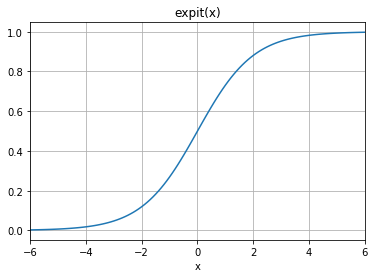

In [2]:
x = np.linspace(-6, 6, 121)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()



## Loading the data, and filtering only 8&9 digitis with with corresponding labels of 0/1

[0 0 0 ... 1 1 1]


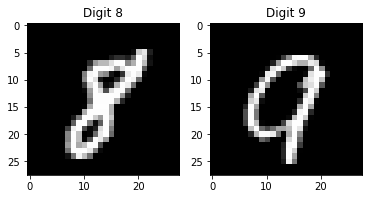

Dimensions: 5878 x 784
Digits: 8 9
labels: [0 1]
Class distribution: [2875 3003]


In [3]:
def filter(images, labels):
    '''
    :param images:
    :param labels:
    :return: filted images and labels , images will have only 8/9 images,
             with corresponding labels of 0/1
    '''
    index_of_nine = []
    index_of_eight = []
    for index, label in enumerate(labels):
        if label == 8:
            index_of_eight.append(index)
        elif label == 9:
            index_of_nine.append(index)
    join_eight_nine_list = [*index_of_eight, *index_of_nine]
    images = np.take(images, join_eight_nine_list, axis=0)
    labels = np.take(labels, join_eight_nine_list, axis=0)
    labels = np.array([0 if label == 8 else 1 for label in labels])
    return (images, labels)


train_x, train_y = loadlocal_mnist(
    images_path='/home/maor/Desktop/MMA202/section4/code/data/train-images.idx3-ubyte',
    labels_path='/home/maor/Desktop/MMA202/section4/code/data/train-labels.idx1-ubyte')
train_x = train_x[:30000]
train_y = train_y[:30000]
train_x, train_y = filter(train_x, train_y)

test_x, test_y = loadlocal_mnist(
    images_path='/home/maor/Desktop/MMA202/section4/code/data/t10k-images.idx3-ubyte',
    labels_path='/home/maor/Desktop/MMA202/section4/code/data/t10k-labels.idx1-ubyte')
test_x = test_x[:3000]
test_y = test_y[:3000]
test_x, test_y = filter(test_x, test_y)
scaler = MinMaxScaler()
test_x = scaler.fit_transform(test_x)

digit_8 = train_x[0].reshape((28, 28))
digit_9 = train_x[-1].reshape((28, 28))
print(train_y)
plt.subplot(121, title='Digit 8')
plt.imshow(digit_8, cmap='gray');
plt.subplot(122, title='Digit 9')
plt.imshow(digit_9, cmap='gray');
plt.show()

print('Dimensions: %s x %s' % (train_x.shape[0], train_x.shape[1]))
print('Digits: 8 9')
print('labels: %s' % np.unique(train_y))
print('Class distribution: %s' % np.bincount(train_y))


### The functions we will be using

In [7]:
def data_init(X, y):
    '''

    :param X:train_x
    :param y:train_y - labels
    :return: add a ones to each row of train_x
                create zeros weights called params
                make the laable a matrix insted of just list.
    '''
    y = y[:, np.newaxis]
    m = len(y)
    X = np.hstack((np.ones((m, 1)), X))
    n = np.size(X, 1)
    params = np.zeros((n, 1))
    # params = np.random.randn(n,1)
    return (X, y, params)


def sigmoid(x):
    return expit(x)


def compute_cost(X, y, theta):
    N = len(y)
    cost = np.sum(np.log(1 + np.exp(-y * (X @ theta)))) / N
    return cost


def Vectorized_cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * (((-y).T @ np.log(h)) - ((1 - y).T @ np.log(1 - h)))
    return cost


def predict(features, weights):
    z = np.dot(features, weights)
    return expit(z)


def cost_function(features, labels, weights):
    observations = len(labels)
    predictions = predict(features, weights)
    # Take the error when label=1
    class1_cost = -labels * np.log(predictions)
    # Take the error when label=0
    class2_cost = (1 - labels) * np.log(1 - predictions)
    # Take the sum of both costs
    cost = class1_cost - class2_cost
    # Take the average cost
    cost = cost.sum() / observations
    return cost


def gradient_descent(features, labels, weights, lr):
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T, predictions - labels)
    gradient /= N
    gradient *= lr
    weights -= gradient
    return weights


def train(features, labels, weights, lr, iters):
    cost_history = []
    for i in range(iters):
        weights = gradient_descent(features, labels, weights, lr)
        # Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
        # Log Progress
        if i % 1000 == 0:
            print("iter: " + str(i) + " cost: " + str(cost))

    return cost_history, weights




## Training the program


iter: 0 cost: 0.2921735259419504
iter: 1000 cost: 0.034573161797979354
iter: 2000 cost: 0.028539659853212305
iter: 3000 cost: 0.02522814442504989
iter: 4000 cost: 0.022919515451975122
iter: 5000 cost: 0.02113948258907352
iter: 6000 cost: 0.019695869792199144
iter: 7000 cost: 0.018486370654638776
iter: 8000 cost: 0.017448085434597586
iter: 9000 cost: 0.01653993188661756
iter: 0 cost: 0.015734554966970314
iter: 1000 cost: 0.015509634885455469
iter: 2000 cost: 0.015291718315392442
iter: 3000 cost: 0.015080432616177097
iter: 4000 cost: 0.014875440519044878
iter: 5000 cost: 0.01467643601137695
iter: 6000 cost: 0.014483140511414853
iter: 7000 cost: 0.01429529930469016
iter: 8000 cost: 0.01411267824390643
iter: 9000 cost: 0.013935060737155244
iter: 0 cost: 0.013762301888221059
iter: 1000 cost: 0.01364966448341234
iter: 2000 cost: 0.01353902357640087
iter: 3000 cost: 0.013430327674853141
iter: 4000 cost: 0.013323526981481705
iter: 5000 cost: 0.013218573245563452
iter: 6000 cost: 0.013115419642

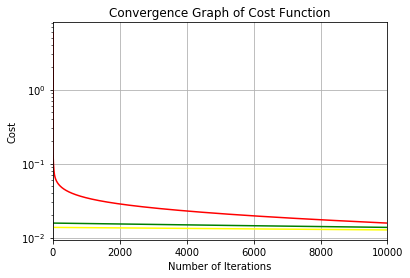

In [9]:
(X, y, params) = data_init(train_x, train_y)
scaler = MinMaxScaler()
#
X = scaler.fit_transform(X)

# %%


lr_list = [1, 0.3, 0.2, ]
c_list = ['red', 'green', 'yellow']


for lr, color in zip(lr_list, c_list):
    (cost_history, params_optimal) = train(X, y, params, lr, 10000)
    plt.plot(range(len(cost_history)), cost_history, c=color);
# (cost_history, params_optimal) = train(X, y, params, 1, 100)
# plt.plot(range(len(cost_history)), cost_history, c='red')
plt.yscale('log')
x = np.linspace(0, 10000, 1001)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.xlim(0, 10000)
plt.grid()
plt.ylabel("Cost")
plt.show()

### now we will evaluate our program

In [ ]:
def predict2(X, params):
    y_pred_dummy = np.round(sigmoid(X @ params))
    y_pred = np.where(y_pred_dummy == 0, -1, 1)
    return y_pred


def get_accuracy(y_pred, y):
    score = float(sum(y_pred == y)) / float(len(y)) * 100

    return score


def evaluate(train_X, train_y, test_X, test_y, learning_rate):
    (X, y, params) = data_init(train_X, train_y)
    X = scaler.fit_transform(X)

    (_, params_optimal_1) = train(X, y, params, 1,1000)

    X_normalized = test_X

    X_test = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

    y_pred_train = predict2(X, params_optimal_1)

    train_score = get_accuracy(y_pred_train, y)
    print('Training Score:', train_score)

    y_pred_test = predict2(X_test, params_optimal_1)

    test_score = get_accuracy(y_pred_test, test_y[:, np.newaxis])
    print('Test Score:', test_score)


print('Evaluation results:')
print('-' * 50)
evaluate(train_x, train_y, test_x, test_y, 1)


## Evaluating the results

In [10]:
def predict2(X, params):
    y_pred_dummy = np.round(sigmoid(X @ params))
    y_pred = np.where(y_pred_dummy == 0, -1, 1)
    return y_pred


def get_accuracy(y_pred, y):
    score = float(sum(y_pred == y)) / float(len(y)) * 100

    return score


def evaluate(train_X, train_y, test_X, test_y, learning_rate):
    (X, y, params) = data_init(train_X, train_y)
    X = scaler.fit_transform(X)

    (_, params_optimal_1) = train(X, y, params, 1,1000)

    X_normalized = test_X

    X_test = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

    y_pred_train = predict2(X, params_optimal_1)

    train_score = get_accuracy(y_pred_train, y)
    print('Training Score:', train_score)

    y_pred_test = predict2(X_test, params_optimal_1)

    test_score = get_accuracy(y_pred_test, test_y[:, np.newaxis])
    print('Test Score:', test_score)


print('Evaluation results:')
print('-' * 50)
evaluate(train_x, train_y, test_x, test_y, 1)


Evaluation results:
--------------------------------------------------
iter: 0 cost: 0.2921735259419504
Training Score: 50.44232732221844
Test Score: 48.364888123924274
